In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

### Recap: basic operations in Jupyter notebook, types of cells, executing cells.

### Data import

Read the data in a data frame using pandas, take a look at them, check the size of the data set, rename columns to something easier to type.

In [3]:
data = pd.read_csv('LAE_OII_Strata.txt', sep = '\t', comment = '#')

In [6]:
data.head(5)

,type,wavelength of EL (angstroms),EL flux (erg/cm^2/s),continuum flux density,EW observed
0,LAE,4114.6,1.787900e-16,1.0146,99.516
1,LAE,3869.9,6.304500e-17,0.2145,146.820
2,LAE,3962.6,6.446300e-17,0.2983,113.190
3,LAE,3901.7,1.007500e-16,0.0211,2424.600
4,LAE,3954.3,7.311100e-17,1.0416,36.611


In [7]:
data.shape

(5436, 5)

In [8]:
data.columns = ['type', 'wavelength', 'ELflux', 'continuum', 'EW']

In [9]:
data.head()

,type,wavelength,ELflux,continuum,EW
0,LAE,4114.6,1.787900e-16,1.0146,99.516
1,LAE,3869.9,6.304500e-17,0.2145,146.820
2,LAE,3962.6,6.446300e-17,0.2983,113.190
3,LAE,3901.7,1.007500e-16,0.0211,2424.600
4,LAE,3954.3,7.311100e-17,1.0416,36.611


### Data exploration

Look at data properties divided by type to figure out some differences between LAEs and OIIs. Change settings to visualize all the columns in a data frame. Eliminate outliers.

In [10]:
data.describe()

,wavelength,ELflux,continuum,EW
count,5436.00000,5.436000e+03,5436.000000,5436.000000
mean,4015.02660,2.449815e-16,68.686761,440.655398
std,112.44312,1.021284e-15,854.380290,3353.032457
min,3800.20000,4.276800e-17,-0.241100,0.008900
25%,3923.27500,5.849275e-17,0.208650,17.725000
50%,4018.35000,7.434850e-17,0.504750,80.634000
75%,4113.52500,1.123825e-16,2.763625,188.425000
max,4200.00000,3.426100e-14,41370.000000,157450.000000


In [11]:
data.groupby('type').describe()

ELflux                                                          \
       count          mean           std           min           25%   
type                                                                   
LAE   4415.0  8.005258e-17  3.630592e-17  4.276800e-17  5.655650e-17   
OII   1021.0  9.581660e-16  2.219254e-15  4.495600e-17  1.125200e-16   

                                                    EW               ...    \
               50%           75%           max   count        mean   ...     
type                                                                 ...     
LAE   6.891900e-17  9.028000e-17  4.380200e-16  4415.0  540.767356   ...     
OII   2.738200e-16  7.966100e-16  3.426100e-14  1021.0    7.752076   ...     

     continuum          wavelength                                            \
           75%      max      count         mean         std     min      25%   
type                                                                           
LAE     0.8817   2669.9     4415.0  4003.127475  112.761281  3800.2  3908.35   
OII   149.6100  41370.0     1021.0  4066.480705   95.303749  3826.2  3998.80   

                              
         50%     75%     max  
type                          
LAE   3999.6  4103.1  4200.0  
OII   4085.8  4148.2  4199.8  

[2 rows x 32 columns]

In [12]:
pd.set_option('display.max_columns', 500)

In [13]:
data.groupby('type').describe(percentiles = [])

ELflux                                                          \
       count          mean           std           min           50%   
type                                                                   
LAE   4415.0  8.005258e-17  3.630592e-17  4.276800e-17  6.891900e-17   
OII   1021.0  9.581660e-16  2.219254e-15  4.495600e-17  2.738200e-16   

                        EW                                             \
               max   count        mean          std     min       50%   
type                                                                    
LAE   4.380200e-16  4415.0  540.767356  3713.490362  0.0304  111.1700   
OII   3.426100e-14  1021.0    7.752076     8.049062  0.0089    5.1784   

                 continuum                                                     \
             max     count        mean          std     min      50%      max   
type                                                                            
LAE   157450.000    4415.0    3.095571    58.841667 -0.2411   0.3545   2669.9   
OII       69.723    1021.0  352.315656  1943.049897  0.6176  35.0440  41370.0   

     wavelength                                                   
          count         mean         std     min     50%     max  
type                                                              
LAE      4415.0  4003.127475  112.761281  3800.2  3999.6  4200.0  
OII      1021.0  4066.480705   95.303749  3826.2  4085.8  4199.8

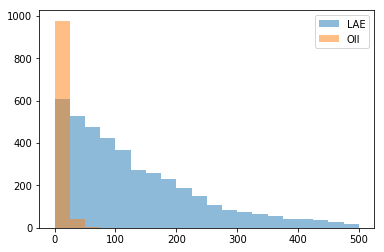

In [19]:
plt.hist(data[data.type == 'LAE']['EW'], bins = 20, alpha = 0.5, range = (0,500), label = 'LAE');
plt.hist(data[data.type == 'OII']['EW'], bins = 20, alpha = 0.5, range = (0,500), label = 'OII');
plt.legend();

In [20]:
data.drop(['type'],axis=1)

,wavelength,ELflux,continuum,EW
0,4114.6,1.787900e-16,1.0146,99.5160
1,3869.9,6.304500e-17,0.2145,146.8200
2,3962.6,6.446300e-17,0.2983,113.1900
3,3901.7,1.007500e-16,0.0211,2424.6000
4,3954.3,7.311100e-17,1.0416,36.6110
5,3896.6,5.990100e-16,18.7050,16.2200
6,4108.6,1.456500e-15,284.1400,2.8862
7,4098.2,2.862100e-15,205.8200,7.7904
8,4079.0,1.019300e-16,1.7645,32.0610
9,3900.4,8.694700e-17,1.2852,34.3300


In [21]:
seldata = data[(np.abs(stats.zscore(data.drop(['type'],axis=1))) < 3).all(axis=1)]

In [22]:
seldata.shape, data.shape

((5342, 5), (5436, 5))

In [23]:
seldata.groupby('type').describe()

ELflux                                                          \
       count          mean           std           min           25%   
type                                                                   
LAE   4405.0  8.001918e-17  3.624174e-17  4.276800e-17  5.654600e-17   
OII    937.0  5.076188e-16  6.581478e-16  4.495600e-17  1.039400e-16   

                                                    EW              \
               50%           75%           max   count        mean   
type                                                                 
LAE   6.890100e-17  9.029900e-17  4.380200e-16  4405.0  418.844450   
OII   2.401000e-16  6.004000e-16  3.306200e-15   937.0    7.901651   

                                                                 continuum  \
              std     min      25%       50%      75%        max     count   
type                                                                         
LAE   1515.982457  0.0522  48.2520  111.0500  218.310  10258.000    4405.0   
OII      8.120390  0.0394   2.1635    5.4446   10.855     69.723     937.0   

                                                                          \
            mean         std     min      25%     50%       75%      max   
type                                                                       
LAE     1.894401   16.136510 -0.2411   0.1753   0.355    0.8821   873.64   
OII   117.992090  254.753536  0.6176  10.0490  28.402  101.0600  2184.10   

     wavelength                                                           \
          count         mean         std     min     25%     50%     75%   
type                                                                       
LAE      4405.0  4003.180499  112.742738  3800.2  3908.4  3999.6  4103.1   
OII       937.0  4070.191889   92.860764  3826.2  4002.5  4089.3  4149.4   

              
         max  
type          
LAE   4200.0  
OII   4199.8

### Transform pandas data frame into a numpy array that can be fed to sklearn methods.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
newcol = le.fit_transform(seldata.type.values)

In [27]:
newcol

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
newcol = 1 - newcol

In [29]:
newcol

array([1, 1, 1, ..., 0, 1, 1])

In [30]:
seldata.loc[:,'type'] = newcol

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
seldata.head()

,type,wavelength,ELflux,continuum,EW
0,1,4114.6,1.787900e-16,1.0146,99.516
1,1,3869.9,6.304500e-17,0.2145,146.820
2,1,3962.6,6.446300e-17,0.2983,113.190
3,1,3901.7,1.007500e-16,0.0211,2424.600
4,1,3954.3,7.311100e-17,1.0416,36.611


In [32]:
X, y = seldata.drop('type',axis=1), seldata.type

In [35]:
normalized_X = (X - X.mean())/X.std()

In [36]:
normalized_X.describe()

,wavelength,ELflux,continuum,EW
count,5.342000e+03,5.342000e+03,5.342000e+03,5.342000e+03
mean,4.764307e-14,7.272356e-16,-3.351868e-16,2.660212e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.909843e+00,-3.490171e-01,-1.933709e-01,-2.502623e-01
25%,-8.145499e-01,-3.007989e-01,-1.895221e-01,-2.361628e-01
50%,2.548601e-02,-2.526010e-01,-1.870733e-01,-1.905579e-01
75%,8.766394e-01,-1.415343e-01,-1.708365e-01,-1.132138e-01
max,1.645968e+00,9.797628e+00,1.857999e+01,7.153828e+00


### A quick way to see what variables are important

Create a simple linear model and use the cofficients of different variables to track variables' importance. Useful when there are many and we want to get rid of some of them, or to just build understanding of the model. Note that this doesn't properly inform one of which variables are redundant.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [41]:
model.fit(normalized_X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
model.coef_

array([[-0.85213129, -4.89322478, -3.95249985, 11.53403327]])

In [43]:
pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,wavelength,[-0.852131292051079]
1,ELflux,[-4.893224783336056]
2,continuum,[-3.9524998469722292]
3,EW,[11.534033273641825]


### Summary

-  We did basic explorations of data sets. 
-  We learned how to prep data for model building by encoding categorical variables, and getting rid of outliers.
-  We built a simple model to understand variable importance at least roughly.

### First steps with models: Decision Tree Classifier.

Decision trees are nice because they can be interpreted easily. For example, this is a decision tree showing how scientists might decide whether a newly found planet has a good chance to harbor life:

Figure from [here](http://www.machinelearningtutorial.net/2017/01/17/decisiontree/).

<br><div style="text-align: center ">  <b> IS ANYBODY OUT THERE?</b></div>

<img src="Strata_images/exoplanets.svg" width="500"/>

Decision trees work by deciding where to split the data set using values of different features, and where to stop.

Mathematically, a good decision tree is one that maximizes the information gain (e.g. the increase in accuracy) at every "split".

<b> Pros </b> Easy to interpret, fast.

<b> Cons </b> Prone to overfitting.

#### Let's get coding!

-  Import model, fit using k-fold (k = 5) cross validation, establish benchmark performance.

-  Consider the metric and its potential fallbacks by comparing to "dummy" estimator;

-  Calculate and plot the confusion matrix.

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model = DecisionTreeClassifier()

In [46]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [48]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
ypred = model.predict(Xtest)

In [50]:
metrics.accuracy_score(ytest,ypred)

0.9279700654817586

In [52]:
seldata.groupby('type').count()

,wavelength,ELflux,continuum,EW
type,,,,
0,937,937,937,937
1,4405,4405,4405,4405


In [53]:
ypred_dummy = np.ones(len(ytest))

In [54]:
metrics.accuracy_score(ytest,ypred_dummy)

0.8110383536014967

In [55]:
metrics.precision_score(ytest,ypred)

0.9478458049886621

In [56]:
metrics.precision_score(ytest,ypred_dummy)

0.8110383536014967

In [57]:
metrics.recall_score(ytest,ypred)

0.9642445213379469

In [59]:
metrics.recall_score(ytest, ypred_dummy)

1.0

In [62]:
cvmethod = StratifiedKFold(n_splits=5, shuffle = True)

In [65]:
cross_val_score(model, X, y, cv = cvmethod)

array([0.92422825, 0.91861553, 0.92977528, 0.93726592, 0.94101124])

In [80]:
cross_val_score(model, normalized_X, y, cv = cvmethod)

array([0.9354537 , 0.94013096, 0.93539326, 0.94101124, 0.9241573 ])

In [66]:
_.mean(), _.std()

(0.9301792427379713, 0.008207923188416977)

In [67]:
ypred = cross_val_predict(model, X, y, cv = cvmethod)

In [68]:
metrics.accuracy_score(y, ypred)

0.9290527892175215

In [69]:
confusion_matrix(y, ypred)

array([[ 752,  185],
       [ 194, 4211]])

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


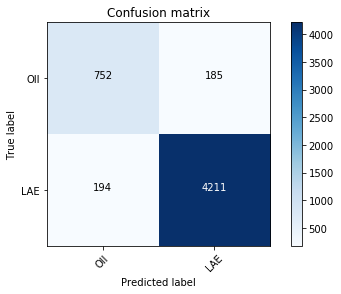

In [71]:
plot_confusion_matrix(confusion_matrix(y,ypred), classes = ['OII', 'LAE'])

### Another easy to interpret algorithm is KNN (K nearest neighbors). 

<div style="text-align: center ">  <b> LET'S FIND SOME NEIGHBORS!</b></div>
<table><tr>
<td> <img src="Strata_images/KNN_1.png" width="350"/> </td>
<td>  <img src="Strata_images/KNN_2.png" width="350"/> </td>
</tr></table>

#### Let's get coding!

Import model, fit using k-fold (k = 5) cross validation, establish benchmark performance, play with basic parameters.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
model = KNeighborsClassifier()

In [75]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [76]:
cross_val_score(model, X, y, cv = cvmethod)

array([0.92703461, 0.9373246 , 0.93164794, 0.92602996, 0.93445693])

In [77]:
_.mean()

0.9312988091359141

In [78]:
cross_val_score(model, normalized_X, y, cv = cvmethod).mean()

0.9391611748177265

In [84]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i)
    print(i, cross_val_score(model, normalized_X, y, cv = cvmethod).mean())

(1, 0.9299881228912877)
(2, 0.9183797381430366)
(3, 0.9378501382159111)
(4, 0.9335456497899608)
(5, 0.9408435900400459)
(6, 0.938038280026487)
(7, 0.9399097129523548)
(8, 0.9384136877546659)
(9, 0.9397241988206977)
(10, 0.941034534708135)


In [87]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [88]:
cross_val_score(model, normalized_X, y, cv = cvmethod).mean()

0.9436545057686312

### Summary

-  We built models with k fold CV
-  We bumped into the accuracy paradox 
-  We used Decision Trees and KNN and obtained accuracy scores of 93-94%

## Part 2: Advanced Algorithms

### Support Vector Machines (classifier)

Support Vector Machines are a long-term staple of machine learning. Parameter tuning is very important in SVMs, and it's the curse and blessing of this algorithm.

<b>Pros: </b> Accurate, Powerful

<b>Cons: </b>  SLOW, need standardization

It's usually a good idea to do parameter optimization on a (representative) selection of your data.

### SVMs in a nutshell

In a classification problem such as this one, SVMs attempts to find the ideal boundary to separate the two classes.

<img src="Strata_images/SVM_1.png" width="300"/>

This looks easy, but even in this simple cases of completely separable variables, there are many possible choices, with different resulting boundaries.

<img src="Strata_images/SVM_2.png" width="300"/> 

SVM's strategy is to 1. Maximize the separation between classes, called the <b> margin </b> and 2. Use slack variables to attribute a "penalty" to misclassifications (soft margin).

<img src="Strata_images/SVM_3.png" width="300"/>

In the more general case of non-linearly-separable variables, SVMs attempt to map the original feature space (for us a 4D space) to a higher dimensionality space, where instances are more separable. The set of functions used for the mapping is called <b>kernel</b>. 
<br>
<br>
<img src="Strata_images/SVM_4.png" width="500"/>


The most important parameters of an SVM are:

- The type of kernel (linear, polynomial, or Gaussian, "rbf" in sklearn);

<img src="Strata_images/SVM_5.png" width="400"/>

- Gamma, the "wiggliness" of the boundary (small gammas = more linear);

<img src="Strata_images/SVM_6.png" width="300"/>

- C, the soft margin parameter (smaller C values assign a smaller penalty to misclassifications near the boundary, and generates a wider margin).

<img src="Strata_images/SVM_7.png" width="300"/>

All the figures in this section are from [here](https://www.ncbi.nlm.nih.gov/pubmed/20221922) and [here](https://www.cs.utexas.edu/~mooney/cs391L/slides/svm.ppt).

### Let's get coding! 

-  Import model;

-  Establish benchmark performance for 5 fold cross validation;

-  Visualize and briefly describe the parameters.

In [89]:
from sklearn.svm import SVC

In [90]:
model = SVC()

In [91]:
cross_val_score(model, X, y, cv = cvmethod)

array([0.82694107, 0.8222638 , 0.82490637, 0.82677903, 0.82397004])

In [94]:
cross_val_score(model, normalized_X, y, cv = cvmethod).mean()

0.935045003380947

In [93]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### How to change parameters

In [96]:
model = SVC(kernel='poly')

In [ ]:
cross_val_score(SVC(kernel ='poly'), normalized_X, y, cv = cvmethod).mean()

<b> TASKS (10-15 mins) </b>

-  Play with different parameters, such as type of kernel (for time scaling reasons, use only poly and rbf), soft margin C, and gamma, to see if you can beat the benchmark performance above. Tip 1: Trying 2-3 values per parameter will be sufficient for now, especially if your machine is taking long. Tip 2: Use low values of gamma (< 1.0) to reduce fitting time.

-  Now do the same thing, but using precision as your scoring method.

In [95]:
cross_val_score(model, normalized_X, y, cv = cvmethod, \
                scoring='precision').mean()

0.9353303459913155

#### Coding Solution.

Introduce Grid Search CV (params, cv, scoring, verbose, n_jobs) as a method to optimize various parameters simultaneously; use timings to get an idea of the speed of various methods.

In [97]:
from sklearn.model_selection import GridSearchCV

In [103]:
cvmethod = StratifiedKFold(n_splits = 4, shuffle=True)

In [101]:
parameters = {'kernel':['rbf','poly'], \
              'gamma':[0.01, 0.1, 0.5], 'C':[1,10,100]}
nmodels = np.product([len(el) for el in parameters.values()])

In [106]:
parameters = {'kernel':['rbf','poly'], \
              'gamma':[0.01, 0.1, 0.5], 'C':[1,10,100]}
nmodels = np.product([len(el) for el in parameters.values()])

start = time.time()
model = GridSearchCV(SVC(), parameters, cv = cvmethod, scoring = 'accuracy', \
                     verbose = 1, n_jobs = 4)
model.fit(normalized_X, y)
stop = time.time()
print(model.best_score_, model.best_params_)
print('Time per model (s)', (stop-start)/float(nmodels*4))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    7.7s finished


(0.9472107824784725, {'kernel': 'rbf', 'C': 100, 'gamma': 0.1})
('Time per model (s)', 0.11206551392873128)


In [107]:
start = time.time()
model = GridSearchCV(SVC(), parameters, cv = cvmethod, scoring = 'precision', \
                     verbose = 1, n_jobs = 4)
model.fit(normalized_X, y)
stop = time.time()
print(model.best_score_, model.best_params_)
print('Time per model (s)', (stop-start)/float(nmodels*4))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    9.9s finished


(0.9543335549275198, {'kernel': 'rbf', 'C': 100, 'gamma': 0.5})
('Time per model (s)', 0.14336725076039633)


### SVM Summary

-  After parameter optimization, SVM's performance improves a bit over the baseline.

-  We learned how to optimize parameters with Grid Search.

-  The best model depends on the metric.

### Ensemble methods: 1. Random Forest Classifiers

Random Forest Classifiers are combinations of decision trees. The "random" part refers to the fact that different trees in the forest are created using random splits of the data, and random subsets of the features. This randomization process makes the algorithm more robust against overfitting, compared to single trees.

<b> Pros: </b> Fast (parallel), robust, insensitive to data range.

<b> Cons: </b> Fast but not fastest when compared to other ensemble methods.

Random Forests have many adjustable parameters. One can tune the parameters of each tree, and the way they are combined.

<img src="Strata_images/DT1.png" width="700"/>

#### Tree Parameters

The figure above shows an example of possible split. The parameters associated to that are:

-  The minimum number of instances in a leaf node;

-  The minimum number of instances required in a split node;

- The maximum depth of tree.

They all deal with reducing overfitting by avoiding to go "too deep" in each tree; it makes sense to change two out of three.

Additional parameters are:

-  The criterion chosen to decide whether a split is "worth it", expressed in terms of information gain;

-  The number of features that are used in building trees.

#### Forest Parameters

In Random Forests, the predictions generated by all the trees are simply averaged to produce the final results. The number of trees in the forest can be adjusted, with the general understanding that more trees are better, but at some point performance will plateau, so one can find the trade-off between having more trees and lower runtime.

### Let's get coding! 

-  Import model;

-  Establish benchmark performance for 5 fold cross validation.

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model = RandomForestClassifier()

In [112]:
cross_val_score(model, normalized_X, y, cv = cvmethod).mean()

0.9425303729351026

<b> TASKS (5 minutes) </b> 

-  Use the get_params() method to find out the names and signatures of different parameters, and their default values.

-  Play with different values of the number of trees (estimators, using values between 5 and 50), maximum depth of tree (usually around 3-8), the minimum amount of instances in a split (2-10), and the maximum number of features (you can decide this one!) allowed in builiding individual trees to see if you can beat the benchmark performance above.

-  Now do the same thing, but using recall as your scoring method.

In [113]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [114]:
parameters = {'max_depth':[3,5,8], \
              'min_samples_split':[2, 5, 10], 'n_estimators':[10,20,50]}
nmodels = np.product([len(el) for el in parameters.values()])

In [115]:
start = time.time()
model = GridSearchCV(RandomForestClassifier(), parameters, cv = cvmethod, scoring = 'accuracy', \
                     verbose = 1, n_jobs = 4)
model.fit(normalized_X, y)
stop = time.time()
print(model.best_score_, model.best_params_)
print('Time per model (s)', (stop-start)/float(nmodels*4))

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.2s


(0.9477723698989142, {'min_samples_split': 5, 'n_estimators': 10, 'max_depth': 5})
('Time per model (s)', 0.10177205668555366)


[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:   10.7s finished


### RF Summary

-  Good performance out of the box.
-  Faster than SVC (this would be even more evident if we had used other parameters for SVMs).
-  Easy to optimize and use.

### Ensemble methods 2: Gradient Boosting Models

Gradient Boosting models are another ensemble method where different decision trees are combined together.

Unlike Random Forests, the model is built by <b> adding individual trees in a sequential fashion, </b>
but choosing which trees we add to the model in a way that minimizes the current loss function. The "Gradient" part refers to the fact that we try to move along the gradient of the objective function (by calculating its numerical derivative) as we add more trees.

The parameters depend on the particular implementation.

In the sklearn formulation, the parameters of each tree are essentially the same we saw above; additionally we have the "learning_rate" parameter, which dictates how much each tree contribute to the final estimator, and the "subsample" parameters, which allows one to use a < 1.0 fraction of samples.

I liked this blog post about parameter tuning for GBMs:

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

#### We'll do the usual import and benchmarking:

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
model = GradientBoostingClassifier()

In [136]:
cross_val_score(model, X, y, cv = cvmethod).mean()

0.9492719459688106

<b> TASKS (10 minutes) </b>

-  Use the get_params() method to find out the names and signatures of different parameters, and their default values.

-  Play with different values of the number of trees (estimators: 5, 10, 20), max depth of tree (2-8), learning rate (0.1-0.5), and the maximum number of features allowed to see how much you can improve the benchmark performance above.

-  Compare the timings to Random Forests.

In [137]:
model.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [138]:
parameters = {'max_depth':[3,5,8], 'learning_rate': [0.1, 0.3, 0.5], 'n_estimators': [10, 20, 50]}
start = time.time()
nmodels = np.product([len(el) for el in parameters.values()])
model = GridSearchCV(GradientBoostingClassifier(), parameters, cv = cvmethod, scoring = 'accuracy', verbose = 1, n_jobs = 4)
model.fit(normalized_X,y)
stop = time.time()
print('Best scores/params', model.best_score_, model.best_params_)
print('Time per model (s)', (stop-start)/float(nmodels*4))

Fitting 4 folds for each of 27 candidates, totalling 108 fits
('Best scores/params', 0.9462748034444028, {'n_estimators': 20, 'learning_rate': 0.1, 'max_depth': 3})
('Time per model (s)', 0.06839527907194914)


[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:    7.1s finished


### A note about xgboost (vs sklearn's GBM)

Sometimes knowns as "regularized" GBM, more robust to overfitting.

Has more flexibility in defining weak learners, and objective function.

Reputation of being very fast.

From the same author as the one above:

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [139]:
import xgboost

In [140]:
model = xgboost.XGBClassifier()

In [141]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [142]:
parameters = {'max_depth':[3,5,8], 'learning_rate': [0.1, 0.3, 0.5], 'subsample': [0.8, 1.0]}
start = time.time()
nmodels = np.product([len(el) for el in parameters.values()])
model = GridSearchCV(xgboost.XGBClassifier(), parameters, cv = cvmethod, scoring = 'accuracy', verbose = 1, n_jobs = 4)
model.fit(normalized_X,y)
stop = time.time()

Fitting 4 folds for each of 18 candidates, totalling 72 fits


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

('Best scores/params', 0.94852115312617, {'subsample': 0.8, 'learning_rate': 0.1, 'max_depth': 3})
('Time per model (s)', 0.11745022071732415)


In [143]:
print('Best scores/params', model.best_score_, model.best_params_)
print('Time per model (s)', (stop-start)/float(nmodels*4))

('Best scores/params', 0.94852115312617, {'subsample': 0.8, 'learning_rate': 0.1, 'max_depth': 3})
('Time per model (s)', 0.11745022071732415)


### Summary so far

-  All of our algorithms performed fairly well.

-  The evaluation metric of interest dictates best parameters.

-  Tree-based methods are faster than SVMs.

#### Subtleties in parameter optimization: See additional notebook

-  Use cv_results to look at gradients along algorithms and build understanding;

-  Push the edges of your parameter grid search; 

-  Do nested cross validation to optimize parameters in order to avoid leakage between the parameter optimization and the cross validation procedure. 

### Tips for advanced optimization (know your data).

Flip data so less common class becomes the positive one and check performance (in particular, recall). Introduce the "class weight" parameter for unbalanced data sets where we are interested in the "uncommon" class; define and use ad-hoc metrics.

In [116]:
newcol

array([1, 1, 1, ..., 0, 1, 1])

In [121]:
y2 = 1 - newcol

In [122]:
y2

array([0, 0, 0, ..., 1, 0, 0])

In [118]:
model = SVC()

In [123]:
cross_val_score(model, normalized_X, y2, cv = cvmethod)

array([0.93792072, 0.93707865, 0.93258427, 0.92958801])

In [124]:
cross_val_score(model, normalized_X, y2, cv = cvmethod, scoring='recall')

array([0.66808511, 0.7008547 , 0.65384615, 0.67948718])

#### The class weight parameter

In SVMs, C, the soft margin parameter, can take different values according to class. <b> This is helpful for imbalanced data sets, where we are interested in the less common objects. </b> This parameter is available for other estimators too!

<img src="Strata_images/SVM_8.png" width="500"/>

In [125]:
parameters = {'kernel':['poly'], \
              'gamma':[0.01, 0.1, 0.5], 'C':[1,10,100], \
              'class_weight':[{1:1},{1:3},{1:5}]}

nmodels = np.product([len(el) for el in parameters.values()])

model = GridSearchCV(SVC(), parameters, cv = cvmethod, scoring = 'recall', \
                     verbose = 1, n_jobs = 4)
model.fit(normalized_X, y2)

print(model.best_score_, model.best_params_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:   16.7s finished


(0.8943471053482445, {'kernel': 'poly', 'C': 100, 'gamma': 0.5, 'class_weight': {1: 5}})


### My advice: Define your own evaluation metric 

This is an example of what we did for this paper (Leung, VA et al 2016), where x0 = 1 - precision and x1 = 1 - recall.

<img src="Strata_images/Formula_Leung.jpg" width="300"/>


#### How to do that in code?

In [127]:
from sklearn.metrics import make_scorer

In [132]:
def my_loss_func(y, ypred):
    return np.log(1+np.abs(y-ypred).max())

In [130]:
model = SVC()

In [133]:
cross_val_score(model, normalized_X, y2, cv = cvmethod, \
               scoring = make_scorer(my_loss_func, greater_is_better=False))

array([-0.69314718, -0.69314718, -0.69314718, -0.69314718])

### Summary

Which algorithm is best, and how you will optimize it, really depends on what you are trying to do.

Define your own evaluation metric and/or pick the one that works best for your problem and your data.

### Additional Content

-  Notebook 1: Nested Cross Validation (the proper way to optimize parameters), Grid Search best practices, Randomized Grid Search.

-  Notebook 2: Diagnostic Tools (Learning Curves, Bias/Variance tradeoff, Feature Importance)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')